In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [73]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [74]:
#1)how many observations are there
len(df)

21613

In [75]:
#2)which all columns are ther
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

price - target variable
date - continuous

numerical - bedrooms - bathrooms - sqft_living - sqft_lot, floors, view, sqft_above, sqft_basement, yr_built(age of the building), yr_renovated,, sqft_living15, sqft_lot15

ordinal - condition - grade,

categorical- waterfront (0 and 1),  zipcode,

interval scale - lat and long

Questions:

univariate:

* date - In which month and year most number of houses where sold?
* bedrooms - Are there any outliers in the number of bedrooms? What is the average number of bedrooms in the dataset?
* bathrooms - Are there houses with no bathrooms? IS the observation correct for these? 
* sqft living - What is the maximum sqft living space. In what range 75% of the sqft values are in?
* water front - what proportion of houses have water front in the observartions?
* floor - No of floors most common in the dataset
* basement - no of houses with a basement
* year - what is the maximum and minimum ages of the houses
* zipcode - which zipcode is most common in the dataset
* renovated - proportion of houses that are renovated

bivariate:
* year - price. Is age affecting the price of the houses
* is renovating the house improving the house price?
* is condition and age correlated
* is price heavily dependent on grade
* is zipcode affecting the price of the house
* is latitude and longitude required with the zipcode
* is the house renovated factor contributiong to price
* is sqft living and sqft lot correlated
* is the price higher for houses with water front
* is the price higher for houses with view
* is number of floors contributing to price of the house
* is no of bathrooms correlated with no of bathrooms
* does houses with waterfront have non zero no of views

In [76]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [95]:
#new varaibles age and whether renevated or not
df['age'] = 2022 -  df['yr_built']

In [93]:
df['renovated'] = np.where((df['yr_renovated'] > 0 )
, 'Yes', 'No')

In [94]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,67,No
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,71,Yes
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,89,No
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,57,No
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,35,No


------------ PRICE ------------------


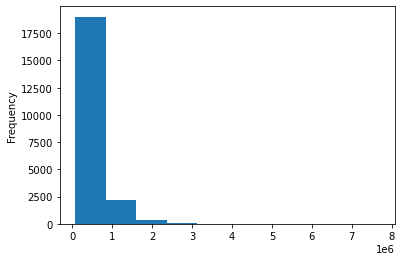

------------ AGE ------------------


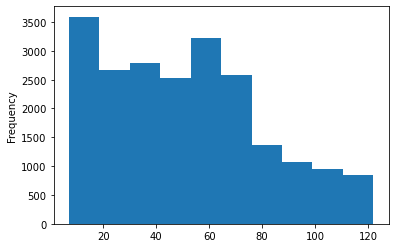

------------ BEDROOMS ------------------


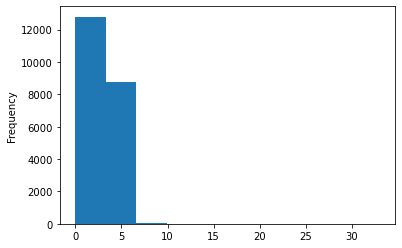

------------ BATHROOMS ------------------


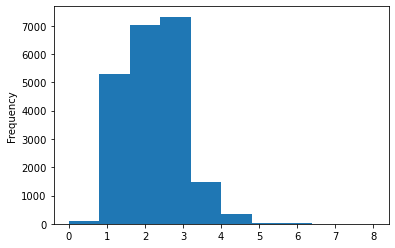

------------ SQFT_LIVING ------------------


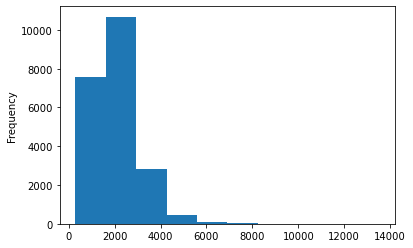

------------ SQFT_LOT ------------------


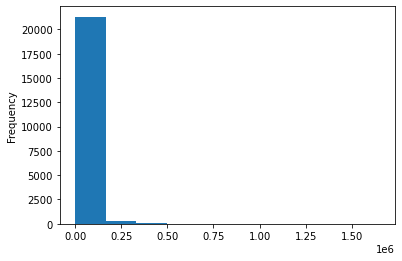

------------ FLOORS ------------------


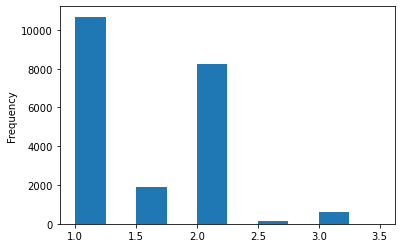

------------ SQFT_ABOVE ------------------


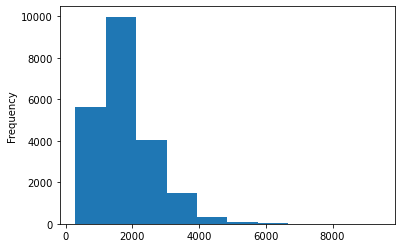

------------ SQFT_BASEMENT ------------------


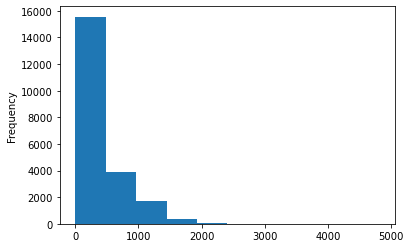

------------ YR_BUILT ------------------


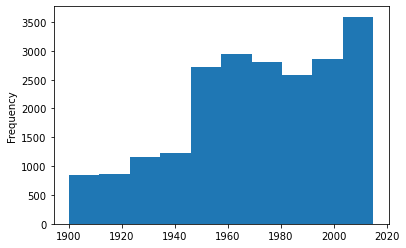

------------ YR_RENOVATED ------------------


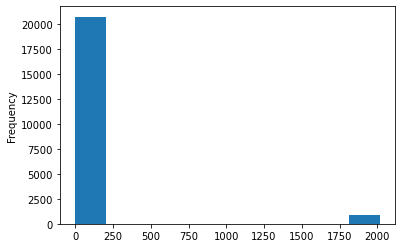

------------ SQFT_LIVING15 ------------------


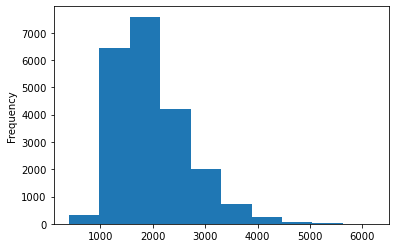

------------ SQFT_LOT15 ------------------


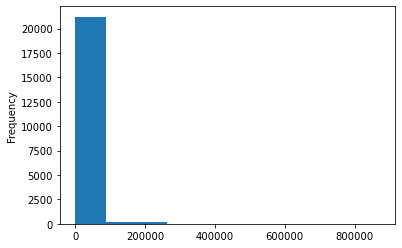

In [79]:
#histogram of numerical varaibles
numVar = ['price', 'age', 'bedrooms','bathrooms', 'sqft_living',
       'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement','yr_renovated', 
       'sqft_living15', 'sqft_lot15']

for var in numVar:
    print('------------',var.upper(),'------------------')
    df[var].plot.hist()
    plt.show()

------------ BEDROOMS ------------------


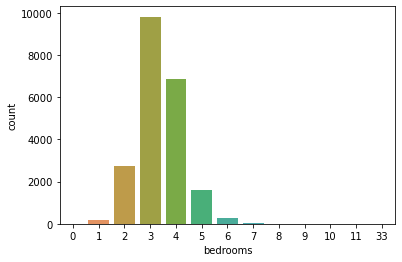

------------ VIEW ------------------


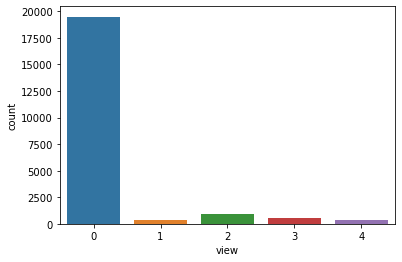

------------ CONDITION ------------------


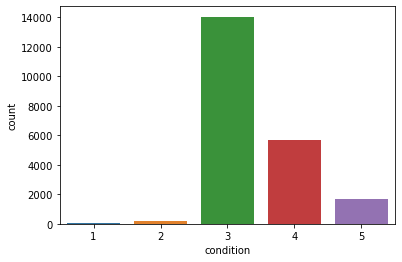

------------ GRADE ------------------


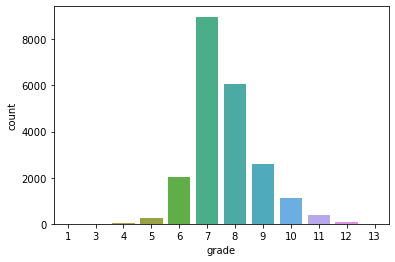

------------ WATERFRONT ------------------


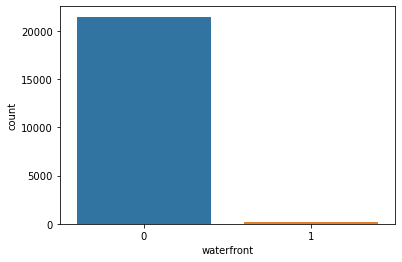

------------ ZIPCODE ------------------


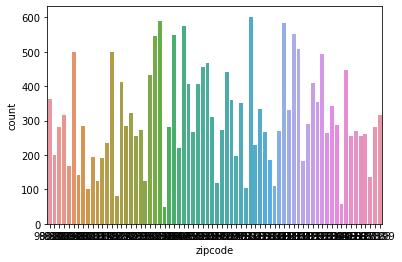

------------ RENOVATED ------------------


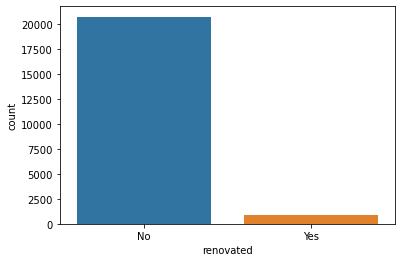

In [96]:
catgvars = ['bedrooms', 'view','condition', 'grade', 'waterfront','zipcode','renovated']

for var in catgvars:
    print('------------',var.upper(),'------------------')
    sb.countplot(x=df[var])
    plt.show()

In [81]:
#x = cont
#scatter plot, correlation coefficient
# if x is discrete/categorical group by agg summary
#side by side box plot
#which varaible do you think are impacting thr prices 
#are there any anomalies

------------ AGE ------------------


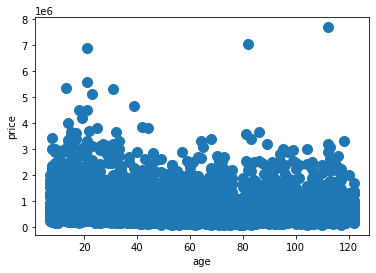

------------ BEDROOMS ------------------


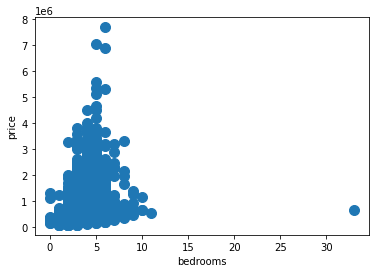

------------ BATHROOMS ------------------


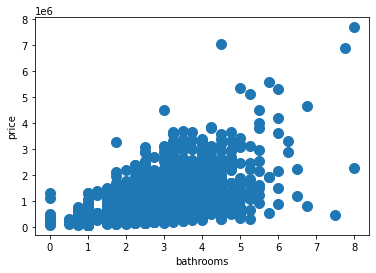

------------ SQFT_LIVING ------------------


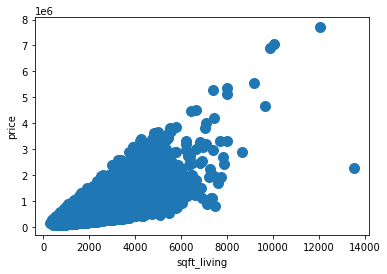

------------ SQFT_LOT ------------------


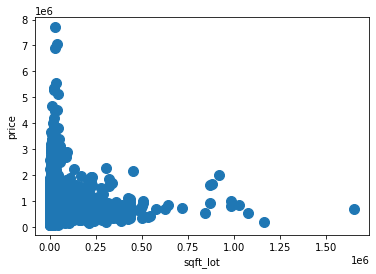

------------ FLOORS ------------------


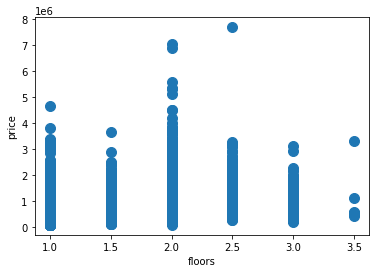

------------ SQFT_ABOVE ------------------


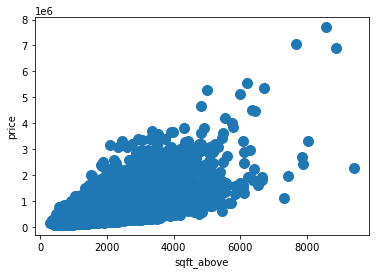

------------ SQFT_BASEMENT ------------------


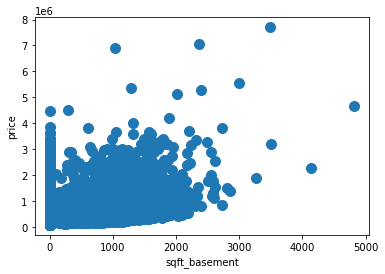

------------ YR_BUILT ------------------


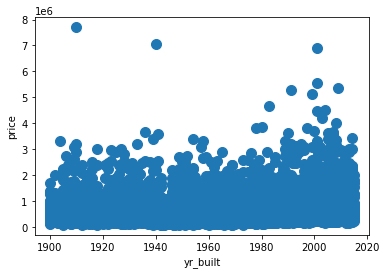

------------ YR_RENOVATED ------------------


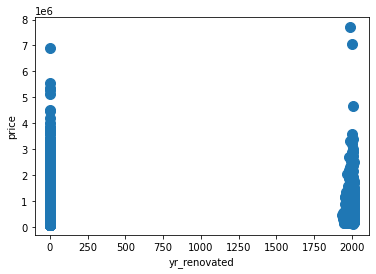

------------ SQFT_LIVING15 ------------------


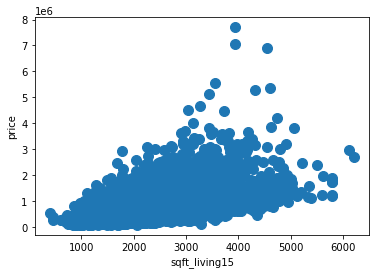

------------ SQFT_LOT15 ------------------


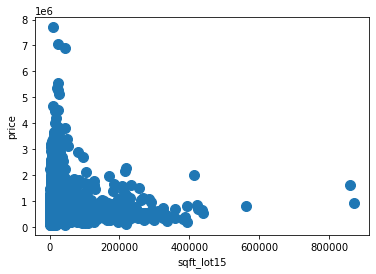

In [82]:
#scatter plot
for var in numVar:
    if var == 'price':
        continue
    print('------------',var.upper(),'------------------')
    df.plot.scatter(x = var, y = 'price', s = 100);
    plt.show()

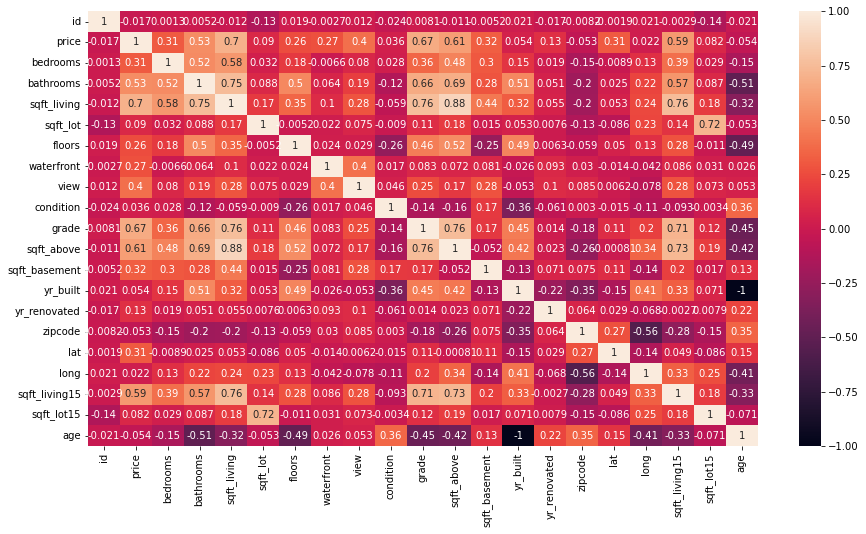

In [101]:
#heatmap

plt.figure(figsize=(15,8))
sb.heatmap(df.corr(), annot=True)
plt.show()

In [84]:
#correlation
for var in numVar:
    if var == 'price':
        continue
    print('price correlation coefficient with',var,':',np.corrcoef(df[var],df['price'])[0][1])

price correlation coefficient with age : -0.05401153149479266
price correlation coefficient with bedrooms : 0.3083495981456382
price correlation coefficient with bathrooms : 0.5251375054139615
price correlation coefficient with sqft_living : 0.7020350546118004
price correlation coefficient with sqft_lot : 0.08966086058710013
price correlation coefficient with floors : 0.25679388755071847
price correlation coefficient with sqft_above : nan
price correlation coefficient with sqft_basement : 0.3238160207119834
price correlation coefficient with yr_built : 0.05401153149479271
price correlation coefficient with yr_renovated : 0.12643379344089312
price correlation coefficient with sqft_living15 : 0.5853789035795679
price correlation coefficient with sqft_lot15 : 0.08244715251948591


------------ VIEW ------------------


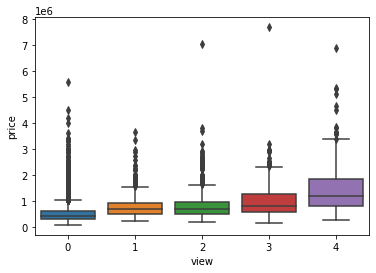

------------ CONDITION ------------------


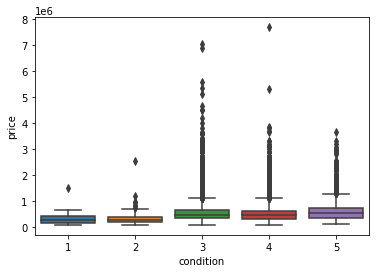

------------ GRADE ------------------


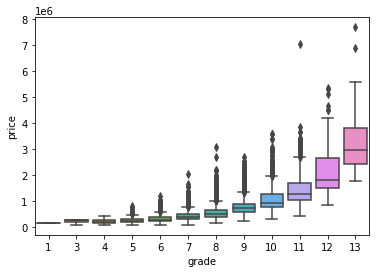

------------ WATERFRONT ------------------


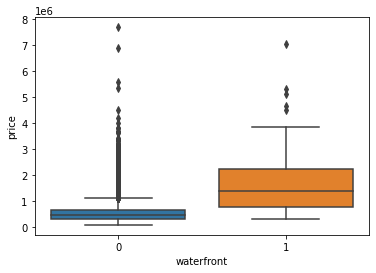

------------ ZIPCODE ------------------


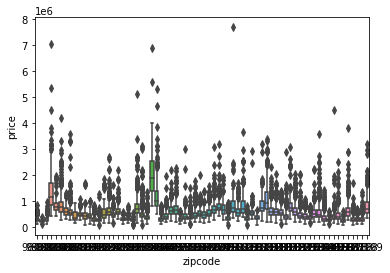

------------ RENOVATED ------------------


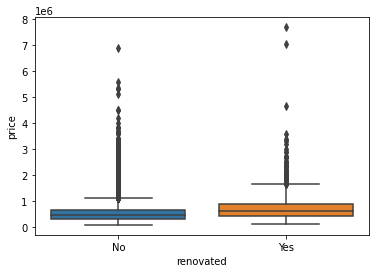

In [99]:
#box plot
catgvars = [ 'view','condition', 'grade', 'waterfront','zipcode','renovated']

for var in catgvars:
    print('------------',var.upper(),'------------------')
    sb.boxplot( x = var ,y = 'price', data = df )
    plt.show()

In [86]:
#group by aggregate (summary)
for var in catgvars:
    print('------------',var.upper(),'------------------')
    print(df['price'].groupby(df[var]).describe())

------------ VIEW ------------------
        count          mean            std       min       25%        50%  \
view                                                                        
0     19489.0  4.965642e+05  287133.300802   75000.0  311000.0   432500.0   
1       332.0  8.122808e+05  510949.684596  217000.0  498750.0   690944.0   
2       963.0  7.924009e+05  510105.050867  169317.0  485000.0   675000.0   
3       510.0  9.719653e+05  612692.235943  154000.0  554000.0   802500.0   
4       319.0  1.463711e+06  952209.550006  252000.0  817500.0  1185000.0   

            75%        max  
view                        
0      600000.0  5570000.0  
1      921250.0  3650000.0  
2      941250.0  7062500.0  
3     1256000.0  7700000.0  
4     1850000.0  6885000.0  
------------ CONDITION ------------------
             count           mean            std       min       25%  \
condition                                                              
1             30.0  334431.666667 

### 1) Which varaible do you think are impacting the price of the house
1. Sqft living (price correlation coefficient with sqft_living : 0.7020350546118004)
2. grade (refer box plot)
3. No of bathrooms (price correlation coefficient with bathrooms : 0.5251375054139615)
4. Waterfront
5. Sqft living 15
6. Sqft above

### Outliers:
1. House with 33 rooms 